<a href="https://colab.research.google.com/github/natthanich/bsc_dpdm22/blob/main/%5Bdataprep1%5Dproperty_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์

In [1]:
#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/MyDrive/bsc_DPDM_data


In [3]:
import pandas as pd

# บ้าน

In [4]:
Home = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name='บ้าน')
Home.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [5]:
Home = Home[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]

In [6]:
 Home['ID ผู้ประเมิน'].unique()

array([1, 2])

## check Missing

In [7]:
Home.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [8]:
Home.dtypes #ดูประเภทข้อมูล

ID ผู้ประเมิน                      int64
post id                           object
property_type                     object
ความมั่นใจในการเมินราคาทรัพย์     object
ราคาทรัพย์                       float64
ประเมินราคาซื้อ-ขาย              float64
ให้คะแนนทรัพย์                    object
dtype: object

In [9]:
Home['ให้คะแนนทรัพย์'] = Home['ให้คะแนนทรัพย์'].fillna('Unknown') # developer_name_en ชื่อบ.ของโครงการมีค่าว่าง ก็เลยเติมเป็น Unknown

In [10]:
Home.fillna(value={'ราคาทรัพย์':Home['ราคาทรัพย์'].mean()},inplace = True) # แทนค่า missing  ด้วย ค่าเฉลี่ย

## นักประเมินคนที่ 1

In [11]:
est1 = Home[Home['ID ผู้ประเมิน']== 1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2.700000e+06,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2.600000e+06,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5.900000e+06,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4.400000e+06,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2.750000e+06,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
155,1,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,4.004721e+06,4500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
156,1,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,4.004721e+06,5200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
157,1,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2.000000e+06,3600000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
158,1,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4.000000e+06,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### Check Missing

In [12]:
est1.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### Quiz

In [13]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,100.0,1.000000e+02,1.000000e+02
mean,1.0,4.004721e+06,3.938500e+06
std,0.0,2.366245e+06,2.368553e+06
min,1.0,3.900000e+05,6.000000e+05
25%,1.0,3.075000e+06,2.775000e+06
50%,1.0,4.004721e+06,3.600000e+06
75%,1.0,4.021041e+06,4.500000e+06
max,1.0,2.094900e+07,1.600000e+07


In [14]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
     

In [15]:
import matplotlib.pyplot as plt

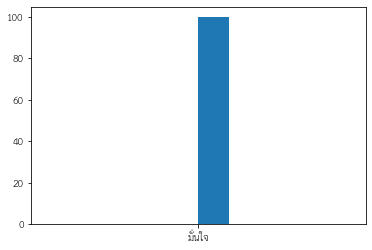

In [16]:
ret1_conf = plt.hist(est1['ความมั่นใจในการเมินราคาทรัพย์'])

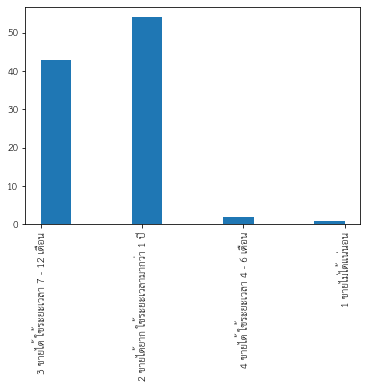

In [17]:
ret1_score = plt.hist(est1['ให้คะแนนทรัพย์'])
plt.xticks(rotation = 'vertical');

In [18]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [19]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [20]:
est1.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,100,100,100,100,100,100


In [21]:
est1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
1 ขายไม่ได้แน่นอน,1,1,1,1,1,1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,54,54,54,54,54,54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,43,43,43,43,43,43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2,2,2,2


## นักประเมินคนที่ 2

In [22]:
est2 = Home[Home['ID ผู้ประเมิน']== 2]
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2.700000e+06,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2.600000e+06,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5.900000e+06,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4.400000e+06,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2.750000e+06,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,4.004721e+06,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,4.004721e+06,7400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2.000000e+06,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4.000000e+06,3900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### Check Missing

In [23]:
est2.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                   False
dtype: bool

In [24]:
est2.dtypes #ดูประเภทข้อมูล

ID ผู้ประเมิน                      int64
post id                           object
property_type                     object
ความมั่นใจในการเมินราคาทรัพย์     object
ราคาทรัพย์                       float64
ประเมินราคาซื้อ-ขาย              float64
ให้คะแนนทรัพย์                    object
dtype: object

#### fillna()

In [25]:
est2.fillna(value={'ประเมินราคาซื้อ-ขาย':est2['ประเมินราคาซื้อ-ขาย'].mean()},inplace = True) # แทนค่า missing  ด้วย ค่าเฉลี่ย

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Quiz

In [26]:
est2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,90.0,9.000000e+01,9.000000e+01
mean,2.0,4.004721e+06,4.153258e+06
std,0.0,2.495642e+06,2.373454e+06
min,2.0,3.900000e+05,9.900000e+05
25%,2.0,2.970000e+06,2.625000e+06
50%,2.0,4.004721e+06,3.900000e+06
75%,2.0,4.152500e+06,4.900000e+06
max,2.0,2.094900e+07,1.700000e+07


In [27]:
est2.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,89,89,89,89,89,89
ไม่มั่นใจ,1,1,1,1,1,1


In [28]:
est2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1,1,1,1,1,1
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,64,64,64,64,64,64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,23,23,23,23,23,23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,1,1,1,1,1,1
Unknown,1,1,1,1,1,1


In [29]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Unknown                                1
Name: ให้คะแนนทรัพย์, dtype: int64

In [88]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย
ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ
hint เริ่มต้นมาเราอยากได้ตารางรูปแบบนี้ก่อน

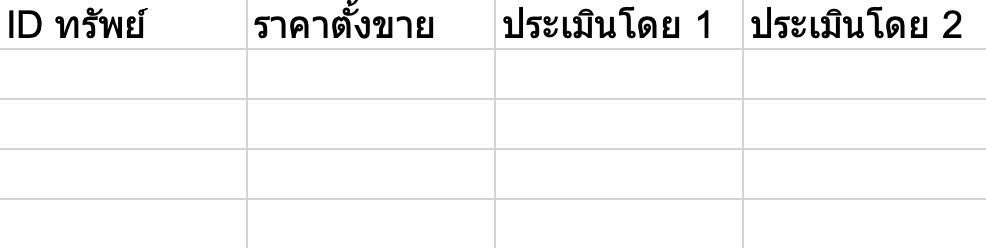


In [32]:
est2['ประเมินโดย1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2
 # est2['ประเมิน1']   // ['ชื่อคอลัมน์(สร้างเอง ที่เอามาจากตารางที่จะเอามา map)']  

<ipython-input-32-9242c435e7a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมินโดย1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดย1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2.700000e+06,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2.600000e+06,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5.900000e+06,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4.400000e+06,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2.750000e+06,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0
...,...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,4.004721e+06,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4500000.0
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,4.004721e+06,7400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,5200000.0
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2.000000e+06,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3600000.0
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4.000000e+06,3900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4000000.0


In [34]:
A = est2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
A

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/25,2.700000e+06,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2.600000e+06,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5.900000e+06,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4.400000e+06,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2.750000e+06,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,4.004721e+06,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,4.004721e+06,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2.000000e+06,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4.000000e+06,4000000.0,3900000.0


In [45]:
#เปลี่ยนชื่อ columns
A.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
A.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0


In [36]:
A.isnull().any()

post id        False
ราคาทรัพย์     False
ประเมินโดย1    False
ประเมินโดย2    False
dtype: bool

### Y_actual = A['ประเมินโดย 1'] , Y_Predicted =A['ประเมินโดย 2']

In [49]:
from sklearn.metrics import mean_absolute_percentage_error

In [52]:
mean_absolute_percentage_error(A['ประเมินโดย1'], A['ประเมินโดย2'])


0.1356028256315807

### Y_actual = A['ประเมินโดย 2'] , Y_Predicted =A['ประเมินโดย 1']

In [56]:
mean_absolute_percentage_error(A['ประเมินโดย2'], A['ประเมินโดย1'])

0.1154689965085877

### Y_actual = A['ราคาทรัพย์'] , Y_Predicted =A['ประเมินโดย 1']

In [54]:
mean_absolute_percentage_error(A['ราคาทรัพย์'], A['ประเมินโดย1'])

0.16634481025196451

### Y_actual = A['ราคาทรัพย์'] , Y_Predicted =A['ประเมินโดย 2']

In [55]:
mean_absolute_percentage_error(A['ราคาทรัพย์'], A['ประเมินโดย2'])

0.18901803056843758

#### สรุปราคาประเมินกับราคาทรัพย์
จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 1 มีค่า น้อยกว่าคน ที่ 2 คือ MAPE = 0.166 และ 0.189 ตามลำดับ จึงจะสรุปได้ว่า การประเมินโดยคนที่ 1 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 2

# ที่ดิน

In [64]:
Area = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name='ที่ดิน')
Area.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,3000000.0,12000-18000,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN


In [65]:
Area = Area[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]

In [66]:
 Area['ID ผู้ประเมิน'].unique()

array([1, 2, 4])

## check Missing

In [80]:
Area.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                   False
dtype: bool

In [68]:
Area.dtypes #ดูประเภทข้อมูล

ID ผู้ประเมิน                      int64
post id                           object
property_type                     object
ความมั่นใจในการเมินราคาทรัพย์     object
ราคาทรัพย์                       float64
ประเมินราคาซื้อ-ขาย              float64
ให้คะแนนทรัพย์                    object
dtype: object

In [69]:
Area['ให้คะแนนทรัพย์'] = Area['ให้คะแนนทรัพย์'].fillna('Unknown') # developer_name_en ชื่อบ.ของโครงการมีค่าว่าง ก็เลยเติมเป็น Unknown

In [70]:
Area.fillna(value={'ราคาทรัพย์':Area['ราคาทรัพย์'].mean()},inplace = True) # แทนค่า missing  ด้วย ค่าเฉลี่ย

## นักประเมินคนที่ 1

In [71]:
ar1 = Area[Area['ID ผู้ประเมิน']== 1]
ar1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,18000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000.0,35000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
12,1,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000.0,2200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
201,1,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,11203590.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
203,1,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,11203590.0,500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,11203590.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,11203590.0,1500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### Check Missing

In [72]:
ar1.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### Quiz

In [73]:
ar1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,100.0,1.000000e+02,1.000000e+02
mean,1.0,1.066827e+07,9.069000e+06
std,0.0,1.069947e+07,2.322360e+07
min,1.0,8.500000e+05,5.000000e+05
25%,1.0,6.525000e+06,1.675000e+06
50%,1.0,1.120359e+07,3.175000e+06
75%,1.0,1.120359e+07,1.000000e+07
max,1.0,9.000000e+07,2.220000e+08


In [74]:
ar1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
Name: ให้คะแนนทรัพย์, dtype: int64

In [75]:
ar1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [76]:
ar1.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,100,100,100,100,100,100


In [77]:
ar1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,55,55,55,55,55,55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,45,45,45,45,45,45


## นักประเมินคนที่ 2

In [78]:
ar2 = Area[Area['ID ผู้ประเมิน']== 2]
ar2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000.0,60000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,11203590.0,4000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,11203590.0,750000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,11203590.0,2500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,11203590.0,1500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### Check Missing

In [79]:
ar2.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### Quiz

In [83]:
ar2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,100.0,1.000000e+02,1.000000e+02
mean,2.0,1.066827e+07,1.196550e+07
std,0.0,1.069947e+07,2.843751e+07
min,2.0,8.500000e+05,7.000000e+05
25%,2.0,6.525000e+06,1.800000e+06
50%,2.0,1.120359e+07,3.800000e+06
75%,2.0,1.120359e+07,1.000000e+07
max,2.0,9.000000e+07,2.500000e+08


In [84]:
ar2.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,100,100,100,100,100,100


In [85]:
ar2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,52,52,52,52,52,52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,45,45,45,45,45,45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3,3,3,3,3,3


In [86]:
ar2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       3
Name: ให้คะแนนทรัพย์, dtype: int64

In [87]:
ar2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย
ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ


In [89]:
len(ar1)

100

In [90]:
len(ar2)

100

In [91]:
ar2['ประเมินโดย1'] = ar2['post id'].map(ar1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
ar2
 # ar2['ประเมิน1']   // ['ชื่อคอลัมน์(สร้างเอง ที่เอามาจากตารางที่จะเอามา map)']  

<ipython-input-91-4bff1c4b360a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar2['ประเมินโดย1'] = ar2['post id'].map(ar1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดย1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000.0,60000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,11203590.0,4000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,4000000.0
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,11203590.0,750000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,11203590.0,2500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2000000.0
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,11203590.0,1500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1500000.0


In [92]:
B = ar2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
B

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/1033,2800000.0,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000.0,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000.0,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000.0,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000.0,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,11203590.0,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,11203590.0,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,11203590.0,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,11203590.0,1500000.0,1500000.0


In [97]:
#เปลี่ยนชื่อ columns
B.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
B.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/1033,2800000.0,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000.0,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000.0,18000000.0,70000000.0


In [98]:
B.isnull().any()

post id        False
ราคาทรัพย์     False
ประเมินโดย1    False
ประเมินโดย2    False
dtype: bool

### Y_actual = B['ประเมินโดย 1'] , Y_Predicted =B['ประเมินโดย 2']

In [94]:
from sklearn.metrics import mean_absolute_percentage_error

In [99]:
mean_absolute_percentage_error(B['ประเมินโดย1'], B['ประเมินโดย2'])


0.7407933970315449

### Y_actual = B['ประเมินโดย 2'] , Y_Predicted =B['ประเมินโดย 1']

In [100]:
mean_absolute_percentage_error(B['ประเมินโดย2'], B['ประเมินโดย1'])

0.42747750827626985

### Y_actual = B['ราคาทรัพย์'] , Y_Predicted =B['ประเมินโดย 1']

In [101]:
mean_absolute_percentage_error(B['ราคาทรัพย์'], B['ประเมินโดย1'])

0.7784351159612349

### Y_actual = B['ราคาทรัพย์'] , Y_Predicted =B['ประเมินโดย 2']

In [102]:
mean_absolute_percentage_error(B['ราคาทรัพย์'], B['ประเมินโดย2'])

0.9264752152441325

#### สรุปราคาประเมินกับราคาทรัพย์
จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 1 มีค่า น้อยกว่าคน ที่ 2 คือ MAPE = 0.778 และ 0.926 ตามลำดับ จึงจะสรุปได้ว่า การประเมินโดยคนที่ 1 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 2


# คอนโด

In [103]:
Condo = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name='คอนโด')
Condo.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000.0,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000.0,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [104]:
Condo = Condo[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]

In [105]:
 Condo['ID ผู้ประเมิน'].unique()

array([1])

## check Missing

In [106]:
Condo.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [107]:
Condo.dtypes #ดูประเภทข้อมูล

ID ผู้ประเมิน                      int64
post id                          float64
property_type                     object
ความมั่นใจในการเมินราคาทรัพย์     object
ราคาทรัพย์                       float64
ประเมินราคาซื้อ-ขาย              float64
ให้คะแนนทรัพย์                    object
dtype: object

## นักประเมินคนที่ 1

In [108]:
cd1 = Condo[Condo['ID ผู้ประเมิน']== 1]
cd1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,1,1395.0,คอนโด,มั่นใจ,1600000.0,2300000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
4,1,1443.0,คอนโด,มั่นใจ,1860000.0,1800000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
5,1,1609.0,คอนโด,มั่นใจ,1490000.0,1500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
6,1,1640.0,คอนโด,มั่นใจ,1280000.0,1600000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
7,1,1641.0,คอนโด,มั่นใจ,4290000.0,2700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
8,1,1650.0,คอนโด,มั่นใจ,1700000.0,1550000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
9,1,1840.0,คอนโด,มั่นใจ,3790000.0,2800000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


### Check Missing

In [109]:
cd1.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### quiz

In [110]:
cd1.describe()

,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,10.0,10.000000,1.000000e+01,1.000000e+01
mean,1.0,1188.900000,2.387800e+06,2.275000e+06
std,0.0,694.328845,1.076989e+06,6.705098e+05
min,1.0,32.000000,1.280000e+06,1.500000e+06
25%,1.0,801.000000,1.625000e+06,1.650000e+06
50%,1.0,1526.000000,1.895000e+06,2.250000e+06
75%,1.0,1640.750000,3.234500e+06,2.775000e+06
max,1.0,1840.000000,4.290000e+06,3.500000e+06


In [111]:
cd1['ให้คะแนนทรัพย์'].value_counts()

4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน     9
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน    1
Name: ให้คะแนนทรัพย์, dtype: int64

In [112]:
cd1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [113]:
cd1.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,10,10,10,10,10,10


In [114]:
cd1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1,1,1,1,1,1
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,9,9,9,9,9,9


## เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย
ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ


In [115]:
#เปลี่ยนชื่อ columns
cd1.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย1'}, inplace=True)
cd1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินโดย1,ให้คะแนนทรัพย์
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


### Y_actual = cd1['ราคาทรัพย์'] , Y_Predicted =cd1['ประเมินโดย 1']

In [117]:
from sklearn.metrics import mean_absolute_percentage_error

In [118]:
mean_absolute_percentage_error(cd1['ราคาทรัพย์'], cd1['ประเมินโดย1'])

0.17349265946250259

#### สรุปราคาประเมินกับราคาทรัพย์
จากค่า MAPE = 0.173 แสดงว่าการประเมินราคาซื้อขายโดยคนที่ 1 มีความคาดเคลื่อนในการพยากรณ์ร้อยละ 17.3 

# ทาวน์โฮม

In [119]:
TownH = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name='ทาวน์โฮม')
TownH.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN


In [120]:
TownH = TownH[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]

In [121]:
 TownH['ID ผู้ประเมิน'].unique()

array([1, 2])

## check Missing

In [122]:
TownH.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [123]:
TownH.dtypes #ดูประเภทข้อมูล

ID ผู้ประเมิน                      int64
post id                           object
property_type                     object
ความมั่นใจในการเมินราคาทรัพย์     object
ราคาทรัพย์                       float64
ประเมินราคาซื้อ-ขาย              float64
ให้คะแนนทรัพย์                    object
dtype: object

In [124]:
TownH.fillna(value={'ราคาทรัพย์':TownH['ราคาทรัพย์'].mean()},inplace = True) # แทนค่า missing  ด้วย ค่าเฉลี่ย

## นักประเมินคนที่ 1

In [125]:
th1 = TownH[TownH['ID ผู้ประเมิน']== 1]
th1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1.045000e+06,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,9.350000e+05,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3.520000e+06,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
6,1,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3.850000e+06,3500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
8,1,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,9.900000e+05,1000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
125,1,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,2.011066e+06,1000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
126,1,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,2.011066e+06,1500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
127,1,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2.011066e+06,1600000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
128,1,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,2.011066e+06,1600000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### Check Missing

In [126]:
th1.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### Quiz

In [127]:
th1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,120.0,1.200000e+02,1.200000e+02
mean,1.0,2.011066e+06,1.832750e+06
std,0.0,6.612920e+05,8.027065e+05
min,1.0,6.050000e+05,3.500000e+05
25%,1.0,1.737500e+06,1.300000e+06
50%,1.0,2.011066e+06,1.600000e+06
75%,1.0,2.011066e+06,2.500000e+06
max,1.0,4.730000e+06,4.200000e+06


In [129]:
th1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [128]:
th1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     100
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
Name: ให้คะแนนทรัพย์, dtype: int64

In [130]:
th1.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,120,120,120,120,120,120


In [131]:
th1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,14,14,14,14,14,14
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,100,100,100,100,100,100
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6,6,6,6,6,6


## นักประเมินคนที่ 2

In [132]:
th2 = TownH[TownH['ID ผู้ประเมิน']== 2]
th2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1.045000e+06,1500000.0,1 ขายไม่ได้แน่นอน
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,9.350000e+05,1500000.0,1 ขายไม่ได้แน่นอน
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3.520000e+06,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3.850000e+06,3200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,9.900000e+05,800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,2.011066e+06,1200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,2.011066e+06,1700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2.011066e+06,1900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,2.011066e+06,1700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### Check Missing

In [133]:
th2.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### Quiz

In [134]:
th2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,120.0,1.200000e+02,1.200000e+02
mean,2.0,2.011066e+06,1.823083e+06
std,0.0,6.612920e+05,7.744988e+05
min,2.0,6.050000e+05,4.000000e+05
25%,2.0,1.737500e+06,1.200000e+06
50%,2.0,2.011066e+06,1.700000e+06
75%,2.0,2.011066e+06,2.300000e+06
max,2.0,4.730000e+06,4.000000e+06


In [136]:
th2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
1 ขายไม่ได้แน่นอน,2,2,2,2,2,2
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,7,7,7,7,7,7
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,103,103,103,103,103,103
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,7,7,7,7,7,7
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,1,1,1,1,1,1


In [135]:
th2.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,120,120,120,120,120,120


In [137]:
th2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     103
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี      7
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        7
1 ขายไม่ได้แน่นอน                       2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

In [138]:
th2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย
ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ



In [139]:
len(th1)

120

In [140]:
len(th2)

120

In [141]:
th2['ประเมินโดย1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2
 # est2['ประเมิน1']   // ['ชื่อคอลัมน์(สร้างเอง ที่เอามาจากตารางที่จะเอามา map)']  

<ipython-input-141-ce3c1d603354>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมินโดย1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดย1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1.045000e+06,1500000.0,1 ขายไม่ได้แน่นอน,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,9.350000e+05,1500000.0,1 ขายไม่ได้แน่นอน,700000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3.520000e+06,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3.850000e+06,3200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,9.900000e+05,800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1000000.0
...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,2.011066e+06,1200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1000000.0
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,2.011066e+06,1700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1500000.0
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2.011066e+06,1900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1600000.0
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,2.011066e+06,1700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1600000.0


In [142]:
C = th2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
C

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/548,1.045000e+06,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,9.350000e+05,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3.520000e+06,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3.850000e+06,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,9.900000e+05,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,2.011066e+06,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,2.011066e+06,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2.011066e+06,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,2.011066e+06,1600000.0,1700000.0


In [143]:
#เปลี่ยนชื่อ columns
C.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
C.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0


In [144]:
C.isnull().any()

post id        False
ราคาทรัพย์     False
ประเมินโดย1    False
ประเมินโดย2    False
dtype: bool

### Y_actual = C['ประเมินโดย 1'] , Y_Predicted =C['ประเมินโดย 2']

In [145]:
from sklearn.metrics import mean_absolute_percentage_error

In [146]:
mean_absolute_percentage_error(C['ประเมินโดย1'], C['ประเมินโดย2'])


0.1121168528826893

### Y_actual = C['ประเมินโดย 2'] , Y_Predicted =C['ประเมินโดย 1']

In [147]:
mean_absolute_percentage_error(C['ประเมินโดย2'], C['ประเมินโดย1'])

0.10619748830198178

### Y_actual = C['ราคาทรัพย์'] , Y_Predicted =C['ประเมินโดย 1']

In [148]:
mean_absolute_percentage_error(C['ราคาทรัพย์'], C['ประเมินโดย1'])

0.2140240452621193

### Y_actual = C['ราคาทรัพย์'] , Y_Predicted =C['ประเมินโดย 2']

In [149]:
mean_absolute_percentage_error(C['ราคาทรัพย์'], C['ประเมินโดย2'])

0.1993088121597759

#### สรุปราคาประเมินกับราคาทรัพย์
จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่า น้อยกว่าคน ที่ 1 คือ MAPE = 0.199 และ 0.214 ตามลำดับ จึงจะสรุปได้ว่า การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่1



# อาคารพาณิชย์/สำนักงาน

In [150]:
Comm = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name='อาคารพาณิชย์')
Comm.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN


In [151]:
Comm = Comm[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]

In [152]:
 Comm['ID ผู้ประเมิน'].unique()

array([1, 2])

## check Missing

In [153]:
Comm.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [154]:
Comm.dtypes #ดูประเภทข้อมูล

ID ผู้ประเมิน                      int64
post id                           object
property_type                     object
ความมั่นใจในการเมินราคาทรัพย์     object
ราคาทรัพย์                       float64
ประเมินราคาซื้อ-ขาย              float64
ให้คะแนนทรัพย์                    object
dtype: object

## นักประเมินคนที่ 1

In [155]:
cm1 = Comm[Comm['ID ผู้ประเมิน']== 1]
cm1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
8,1,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
10,1,https://nayoo.co/khonkaen/posts/30,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4800000.0,3600000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
12,1,https://nayoo.co/khonkaen/posts/35,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2400000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
14,1,https://nayoo.co/khonkaen/posts/497,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000.0,3800000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
16,1,https://nayoo.co/khonkaen/posts/498,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,7000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
18,1,https://nayoo.co/khonkaen/posts/499,อาคารพาณิชย์/สำนักงาน,มั่นใจ,9000000.0,8000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


### Check Missing

In [156]:
cm1.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### Quiz

In [157]:
cm1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,10.0,1.000000e+01,1.000000e+01
mean,1.0,7.710000e+06,6.260000e+06
std,0.0,5.926110e+06,3.913850e+06
min,1.0,2.400000e+06,2.200000e+06
25%,1.0,4.125000e+06,3.650000e+06
50%,1.0,6.000000e+06,5.000000e+06
75%,1.0,8.500000e+06,7.750000e+06
max,1.0,2.250000e+07,1.350000e+07


In [158]:
cm1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [159]:
cm1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     3
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      2
Name: ให้คะแนนทรัพย์, dtype: int64

In [160]:
cm1.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,10,10,10,10,10,10


In [161]:
cm1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,5,5,5,5,5,5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3,3,3,3,3,3
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2,2,2,2


## นักประเมินคนที่ 2

In [162]:
cm2 = Comm[Comm['ID ผู้ประเมิน']== 2]
cm2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
11,2,https://nayoo.co/khonkaen/posts/30,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4800000.0,4000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
13,2,https://nayoo.co/khonkaen/posts/35,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2400000.0,2100000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
15,2,https://nayoo.co/khonkaen/posts/497,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000.0,5000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
17,2,https://nayoo.co/khonkaen/posts/498,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
19,2,https://nayoo.co/khonkaen/posts/499,อาคารพาณิชย์/สำนักงาน,มั่นใจ,9000000.0,10000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


### Check Missing

In [163]:
cm2.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### Quiz

In [164]:
cm2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,10.0,1.000000e+01,1.000000e+01
mean,2.0,7.710000e+06,7.610000e+06
std,0.0,5.926110e+06,5.408728e+06
min,2.0,2.400000e+06,2.100000e+06
25%,2.0,4.125000e+06,4.000000e+06
50%,2.0,6.000000e+06,6.500000e+06
75%,2.0,8.500000e+06,9.500000e+06
max,2.0,2.250000e+07,2.000000e+07


In [165]:
cm2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,5,5,5,5,5,5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2,2,2,2,2,2
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3,3,3,3,3,3


In [166]:
cm2.groupby(['ความมั่นใจในการเมินราคาทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
ความมั่นใจในการเมินราคาทรัพย์,,,,,,
มั่นใจ,10,10,10,10,10,10


In [167]:
cm2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      3
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     2
Name: ให้คะแนนทรัพย์, dtype: int64

In [168]:
cm2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย
ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ



In [169]:
len(cm1)

10

In [170]:
len(cm2)

10

In [172]:
cm2['ประเมินโดย1'] = cm2['post id'].map(cm1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
cm2
 # est2['ประเมิน1']   // ['ชื่อคอลัมน์(สร้างเอง ที่เอามาจากตารางที่จะเอามา map)']  

<ipython-input-172-1ce5cd9d31a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cm2['ประเมินโดย1'] = cm2['post id'].map(cm1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดย1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,13500000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2200000.0
11,2,https://nayoo.co/khonkaen/posts/30,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4800000.0,4000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,3600000.0
13,2,https://nayoo.co/khonkaen/posts/35,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2400000.0,2100000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2500000.0
15,2,https://nayoo.co/khonkaen/posts/497,อาคารพาณิชย์/สำนักงาน,มั่นใจ,5000000.0,5000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,3800000.0
17,2,https://nayoo.co/khonkaen/posts/498,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,7000000.0
19,2,https://nayoo.co/khonkaen/posts/499,อาคารพาณิชย์/สำนักงาน,มั่นใจ,9000000.0,10000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,8000000.0


In [173]:
D = cm2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
D

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [174]:
#เปลี่ยนชื่อ columns
D.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
D.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0


In [175]:
D.isnull().any()

post id        False
ราคาทรัพย์     False
ประเมินโดย1    False
ประเมินโดย2    False
dtype: bool

### Y_actual = D['ประเมินโดย 1'] , Y_Predicted =D['ประเมินโดย 2']

In [176]:
from sklearn.metrics import mean_absolute_percentage_error

In [177]:
mean_absolute_percentage_error(D['ประเมินโดย1'], D['ประเมินโดย2'])


0.2158208906103643

### Y_actual = D['ประเมินโดย 2'] , Y_Predicted =D['ประเมินโดย 1']

In [178]:
mean_absolute_percentage_error(D['ประเมินโดย2'], D['ประเมินโดย1'])

0.1697142857142857

### Y_actual = D['ราคาทรัพย์'] , Y_Predicted =D['ประเมินโดย 1']

In [179]:
mean_absolute_percentage_error(D['ราคาทรัพย์'], D['ประเมินโดย1'])

0.17643894993894996

### Y_actual = D['ราคาทรัพย์'] , Y_Predicted =D['ประเมินโดย 2']

In [180]:
mean_absolute_percentage_error(D['ราคาทรัพย์'], D['ประเมินโดย2'])

0.11732295482295482

#### สรุปราคาประเมินกับราคาทรัพย์
จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่า น้อยกว่าคน ที่ 1 คือ MAPE = 0.117 และ 0.176 ตามลำดับ จึงจะสรุปได้ว่า การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่1